# Observations and Insights

In [26]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [27]:
# Combine the data into a single dataset 
# Display the data table for preview
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [28]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [29]:
merged_data_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")
merged_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [30]:
# Checking the number of mice.

mice_count = merged_data_df["Mouse ID"].count()
mice_count

1893

In [31]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicates = merged_data_df[merged_data_df.duplicated(['Mouse ID', 'Timepoint'])]
duplicates

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [32]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_df = merged_data_df.drop_duplicates("Mouse ID")
clean_df 


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.0,0
10,s185,Capomulin,Female,3,17,0,45.0,0
20,x401,Capomulin,Female,16,15,0,45.0,0
30,m601,Capomulin,Male,22,17,0,45.0,0
40,g791,Ramicane,Male,11,16,0,45.0,0
...,...,...,...,...,...,...,...,...
1858,z314,Stelasyn,Female,21,28,0,45.0,0
1860,z435,Propriva,Female,12,26,0,45.0,0
1863,z581,Infubinol,Female,24,25,0,45.0,0
1873,z795,Naftisol,Female,13,29,0,45.0,0


In [33]:
# Checking the number of mice in the clean DataFrame.

mice_uniques = clean_df["Mouse ID"].count()
mice_uniques

249

# Summary Statistics 

In [47]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary dataframe.

mean = merged_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()

median = merged_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()

variance = merged_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()

standard_deviation = merged_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()

sem = variance = merged_data_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()

statistics_summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": standard_deviation, "SEM": sem})
statistics_summary_df


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,0.329346,4.994774,0.329346
Ceftamin,52.591172,51.776157,0.469821,6.268188,0.469821
Infubinol,52.884795,51.820584,0.492236,6.567243,0.492236
Ketapril,55.235638,53.698743,0.603860,8.279709,0.603860
Naftisol,54.331565,52.509285,0.596466,8.134708,0.596466
Placebo,54.033581,52.288934,0.581331,7.821003,0.581331
Propriva,52.322552,50.854632,0.512884,6.507770,0.512884
Ramicane,40.216745,40.673236,0.320955,4.846308,0.320955
Stelasyn,54.233149,52.431737,0.573111,7.710419,0.573111


# Bar and Pie Charts

In [99]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.

bar_pd = pd.DataFrame(pd.value_counts(merged_data_df["Drug Regimen"]))




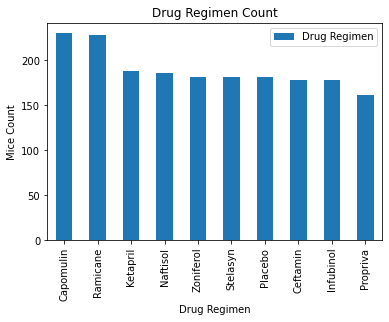

In [100]:
bar_pd.plot(kind = "bar")

plt.title("Drug Regimen Count")

plt.ylabel("Mice Count")

plt.xlabel("Drug Regimen")

plt.show()




In [101]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender_data = merged_data_df["Sex"].value_counts()

gender_data

Male      958
Female    935
Name: Sex, dtype: int64

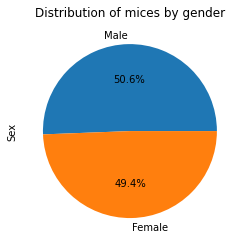

In [105]:
gender_pie = gender_data.plot(kind="pie", autopct='%1.1f%%')

plt.title("Distribution of mices by gender")
plt.show()

# Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint

In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [106]:
merged_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


# Line and Scatter Plots

In [109]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

drug_capomulin_df = merged_data_df[merged_data_df["Drug Regimen"] == "Capomulin"]
drug_capomulin_df.head()


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [112]:
selected_mouse_df = drug_capomulin_df.loc[drug_capomulin_df["Mouse ID"]  == "s185"]
selected_mouse_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
15,s185,Capomulin,Female,3,17,25,33.949940,0
16,s185,Capomulin,Female,3,17,30,32.959671,1
17,s185,Capomulin,Female,3,17,35,28.328531,1
18,s185,Capomulin,Female,3,17,40,25.472143,1
19,s185,Capomulin,Female,3,17,45,23.343598,1


In [117]:
selected_mouse1_df = selected_mouse_df.loc[:, ["Timepoint", "Tumor Volume (mm3)"]]
selected_mouse1_df 

,Timepoint,Tumor Volume (mm3)
10,0,45.000000
11,5,43.878496
12,10,37.614948
13,15,38.177232
14,20,36.866876
15,25,33.949940
16,30,32.959671
17,35,28.328531
18,40,25.472143
19,45,23.343598


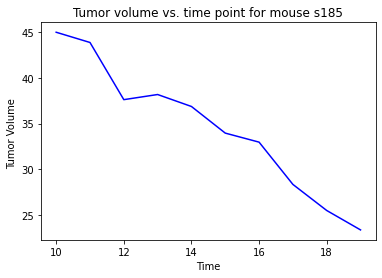

In [126]:
selected_mouse1_df["Tumor Volume (mm3)"].plot(color="blue")


plt.title("Tumor volume vs. time point for mouse s185")

plt.ylabel("Tumor Volume ")

plt.xlabel("Time")

plt.show()


In [127]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen

drug_capomulin_df.head()



,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [130]:
scatter_analysis_df = drug_capomulin_df.loc[:, ["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
scatter_analysis_df 

,Mouse ID,Weight (g),Tumor Volume (mm3)
10,s185,17,45.000000
11,s185,17,43.878496
12,s185,17,37.614948
13,s185,17,38.177232
14,s185,17,36.866876
...,...,...,...
440,i557,24,47.685963
1452,r157,25,45.000000
1453,r157,25,45.597064
1454,r157,25,46.059608


In [141]:
avg_analysis_df = pd.DataFrame(scatter_analysis_df.groupby(["Mouse ID", "Weight (g)"])["Tumor Volume (mm3)"].mean()).reset_index()
avg_analysis_df.head()

,Mouse ID,Weight (g),Tumor Volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


In [146]:
avg_analysis_df = avg_analysis_df.rename(columns={"Tumor Volume (mm3)": "Average Volume (mm3)"})
avg_analysis_df.head()

,Mouse ID,Weight (g),Average Volume (mm3)
0,b128,22,41.963636
1,b742,21,40.083699
2,f966,17,36.505973
3,g288,19,41.990097
4,g316,22,44.613344


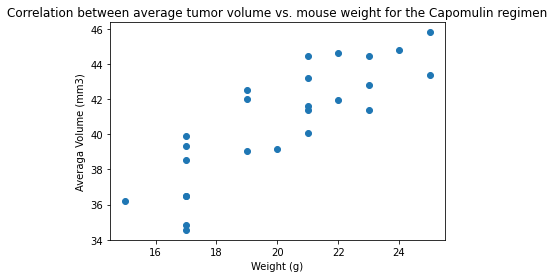

In [153]:
plt.scatter(avg_analysis_df.iloc[:,1],avg_analysis_df.iloc[:,2])

plt.xlabel('Weight (g)')

plt.ylabel('Averaga Volume (mm3)')

plt.title("Correlation between average tumor volume vs. mouse weight for the Capomulin regimen")

plt.show()

# Correlation and Regression

In [167]:
x_ = avg_analysis_df["Weight (g)"]
y_ = avg_analysis_df["Average Volume (mm3)"]

correlation = st.pearsonr(x_,y_)
print(f"The correlation between both factors is {round(correlation[0],2)}")

The correlation between both factors is 0.84


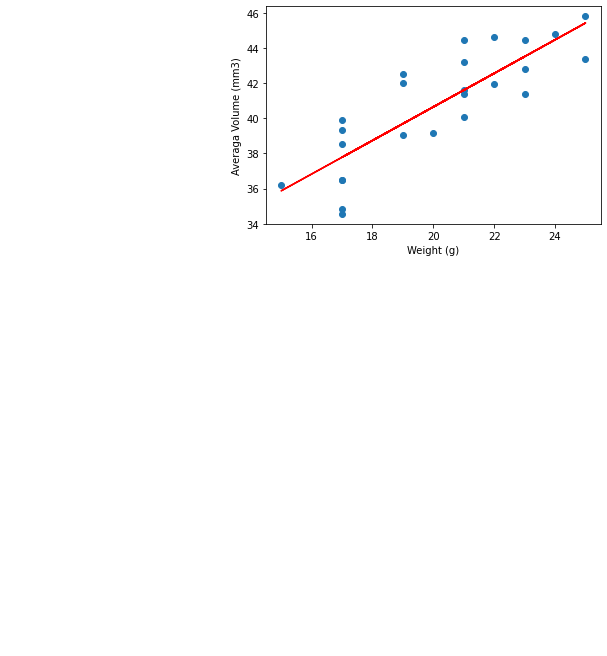

In [169]:
from scipy.stats import linregress

x_values = avg_analysis_df["Weight (g)"]
y_values = avg_analysis_df["Average Volume (mm3)"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Weight (g)')
plt.ylabel('Averaga Volume (mm3)')
plt.show()